<a href="https://colab.research.google.com/github/princeKike27/Tennis-Ace/blob/main/Tennis_Ace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tennis Ace

For this project I analyzed data from  the Association of Tennis Professionals (ATP). This data contains the top 1500 ATP players during the period 2009 - 2017. The goal is to create a linear regression model that predicts the outcome for a tennis player based on their playing habits. By analyzing and modeling the ATP data, I will be able to determine what it takes to be one of the best tennis players in the world.


In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv('https://raw.githubusercontent.com/princeKike27/Tennis-Ace/main/tennis_stats.csv')
df.head(10)

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,BreakPointsSaved,DoubleFaults,ReturnGamesPlayed,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,7,0.43,2,9,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,0,0.57,1,9,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,8,0.40,1,19,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,6,0.40,0,14,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,0,0.50,2,3,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272
5,Andres Artunedo Martinavarro,2014,0.77,0.67,0.09,0.55,0.40,3,0.50,6,2,0.50,1,10,0.10,0.26,9,0.67,0.44,0.64,0,1,10434,495
6,Eduardo Struvay,2014,0.76,0.65,0.31,0.36,0.41,1,0.29,6,7,0.33,0,10,0.20,0.35,9,0.56,0.45,0.58,0,1,24218,1107
7,Riccardo Bellotti,2017,0.76,0.55,0.35,0.39,0.41,0,0.50,9,8,0.33,4,13,0.31,0.37,14,0.57,0.45,0.51,0,1,61154,432
8,Austin Krajicek,2017,0.76,0.78,0.16,0.57,0.49,9,0.25,3,4,0.33,1,17,0.06,0.30,16,0.88,0.50,0.73,0,1,52940,291
9,Guilherme Clezar,2011,0.76,0.56,0.24,0.46,0.13,3,0.00,5,1,0.40,1,9,0.00,0.21,8,0.63,0.38,0.54,0,1,18829,241


In [3]:
# check df shape
df.shape

(1721, 24)

In [4]:
# inspect column types
df.dtypes

Player                         object
Year                            int64
FirstServe                    float64
FirstServePointsWon           float64
FirstServeReturnPointsWon     float64
SecondServePointsWon          float64
SecondServeReturnPointsWon    float64
Aces                            int64
BreakPointsConverted          float64
BreakPointsFaced                int64
BreakPointsOpportunities        int64
BreakPointsSaved              float64
DoubleFaults                    int64
ReturnGamesPlayed               int64
ReturnGamesWon                float64
ReturnPointsWon               float64
ServiceGamesPlayed              int64
ServiceGamesWon               float64
TotalPointsWon                float64
TotalServicePointsWon         float64
Wins                            int64
Losses                          int64
Winnings                        int64
Ranking                         int64
dtype: object

Service Game Columns (Offensive)

    Aces: number of serves by the player where the receiver does not touch the ball
    DoubleFaults: number of times player missed both first and second serve attempts
    FirstServe: % of first-serve attempts made
    FirstServePointsWon: % of first-serve attempt points won by the player
    SecondServePointsWon: % of second-serve attempt points won by the player
    BreakPointsFaced: number of times where the receiver could have won service game of the player
    BreakPointsSaved: % of the time the player was able to stop the receiver from winning service game when they had the chance
    ServiceGamesPlayed: total number of games where the player served
    ServiceGamesWon: total number of games where the player served and won
    TotalServicePointsWon: % of points in games where the player served that they won

Return Game Columns (Defensive)

    FirstServeReturnPointsWon: % of opponents first-serve points the player was able to win
    SecondServeReturnPointsWon: % of opponents second-serve points the player was able to win
    BreakPointsOpportunities: number of times where the player could have won the service game of the opponent
    BreakPointsConverted: % of the time the player was able to win their opponent’s service game when they had the chance
    ReturnGamesPlayed: total number of games where the player’s opponent served
    ReturnGamesWon: total number of games where the player’s opponent served and the player won
    ReturnPointsWon: total number of points where the player’s opponent served and the player won
    TotalPointsWon: % of points won by the player

Outcomes

    Wins: number of matches won in a year
    Losses: number of matches lost in a year
    Winnings: total winnings in USD($) in a year
    Ranking: ranking at the end of year


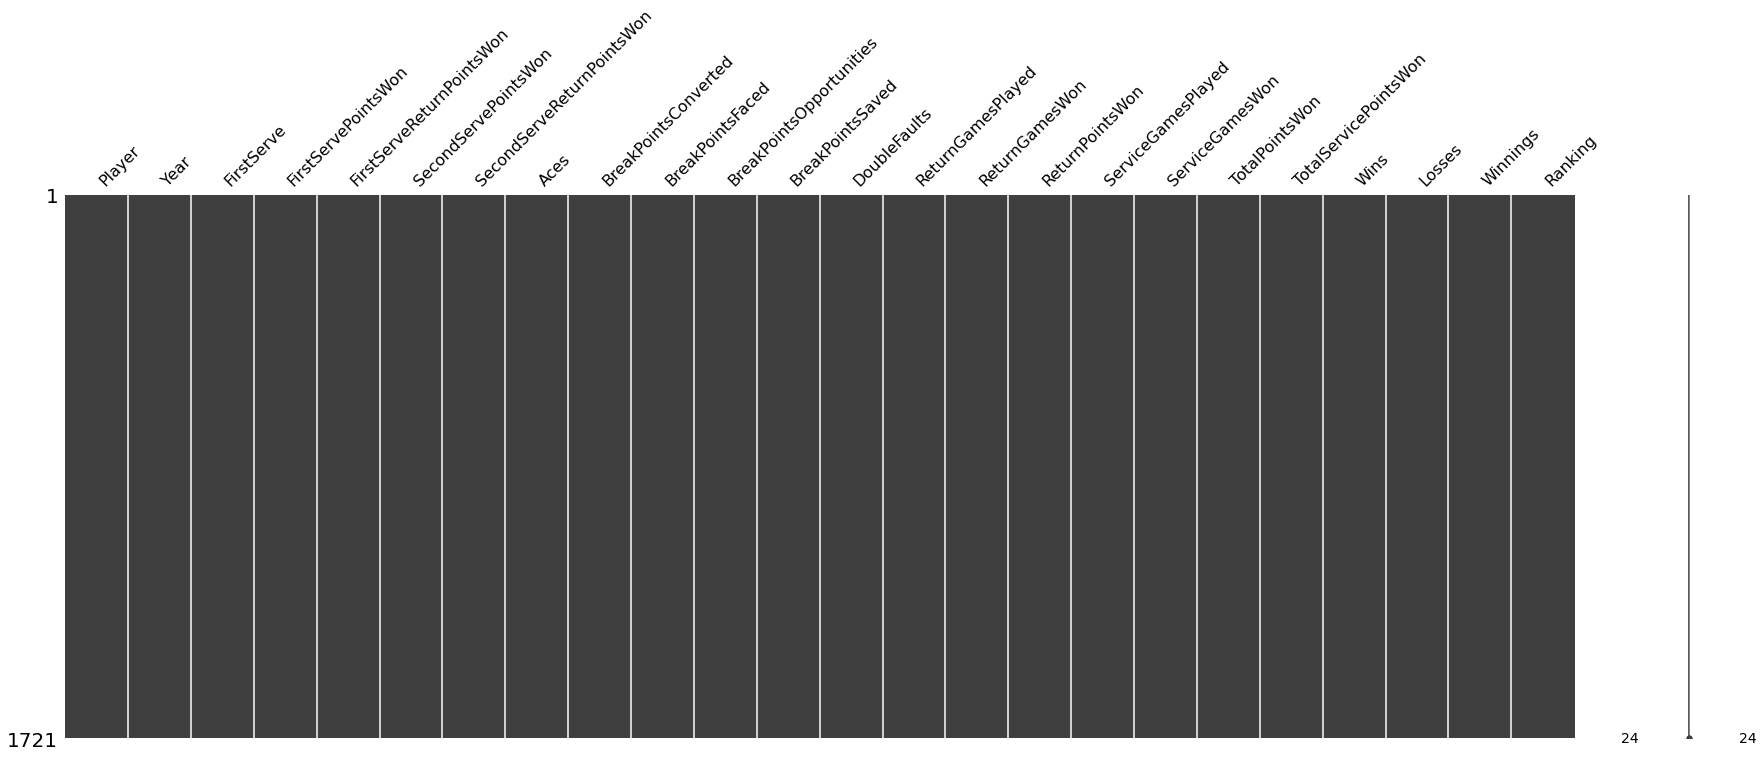

In [5]:
# check for missing values

import missingno as msno

msno.matrix(df, figsize=(30,10))

# Correlation Between Features & Outcomes

In [6]:
# split df into offensive and defensive features
df_offensive = df[['Player', 'Year', 'Aces', 'DoubleFaults', 'FirstServe', 'FirstServePointsWon', 'SecondServePointsWon', 'BreakPointsFaced', 'BreakPointsSaved', 'ServiceGamesPlayed', 'ServiceGamesWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings', 'Ranking']]

df_defensive = df[['Player', 'Year', 'FirstServeReturnPointsWon', 'SecondServeReturnPointsWon', 'BreakPointsOpportunities', 'BreakPointsConverted', 'ReturnGamesPlayed', 'ReturnGamesWon', 'ReturnPointsWon', 'TotalPointsWon', 'Wins', 'Losses', 'Winnings', 'Ranking']]


In [7]:
# correlation matrix of offensive moves and outcomes
df_offensive.corr()

,Year,Aces,DoubleFaults,FirstServe,FirstServePointsWon,SecondServePointsWon,BreakPointsFaced,BreakPointsSaved,ServiceGamesPlayed,ServiceGamesWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
Year,1.000000,-0.108367,-0.071885,0.051406,-0.016728,0.005300,-0.101735,-0.006154,-0.108477,-0.008930,-0.005544,-0.108235,-0.077181,0.043908,-0.040483
Aces,-0.108367,1.000000,0.819031,0.048149,0.460323,0.266269,0.757405,0.282672,0.866138,0.440922,0.472101,0.825301,0.768628,0.798404,-0.277811
DoubleFaults,-0.071885,0.819031,1.000000,-0.005477,0.373321,0.235941,0.917645,0.264818,0.925879,0.378686,0.383379,0.847459,0.881922,0.854685,-0.305866
FirstServe,0.051406,0.048149,-0.005477,1.000000,-0.070659,0.101417,0.057709,0.087945,0.071920,0.137473,0.180996,0.064832,0.053736,0.057882,-0.068759
FirstServePointsWon,-0.016728,0.460323,0.373321,-0.070659,1.000000,0.320765,0.301925,0.405751,0.376460,0.817829,0.860033,0.356702,0.330581,0.361121,-0.150004
SecondServePointsWon,0.005300,0.266269,0.235941,0.101417,0.320765,1.000000,0.258691,0.340147,0.296809,0.650764,0.713076,0.268979,0.250918,0.281215,-0.181013
BreakPointsFaced,-0.101735,0.757405,0.917645,0.057709,0.301925,0.258691,1.000000,0.271783,0.971296,0.354012,0.354005,0.883470,0.943309,0.876036,-0.322082
BreakPointsSaved,-0.006154,0.282672,0.264818,0.087945,0.405751,0.340147,0.271783,1.000000,0.274677,0.518091,0.476143,0.252053,0.246990,0.258271,-0.121220
ServiceGamesPlayed,-0.108477,0.866138,0.925879,0.071920,0.376460,0.296809,0.971296,0.274677,1.000000,0.418467,0.429605,0.929153,0.935182,0.912985,-0.331738
ServiceGamesWon,-0.008930,0.440922,0.378686,0.137473,0.817829,0.650764,0.354012,0.518091,0.418467,1.000000,0.934764,0.385040,0.367345,0.395577,-0.198822


Text(0.5, 1.0, 'Offensive Features Correlation')

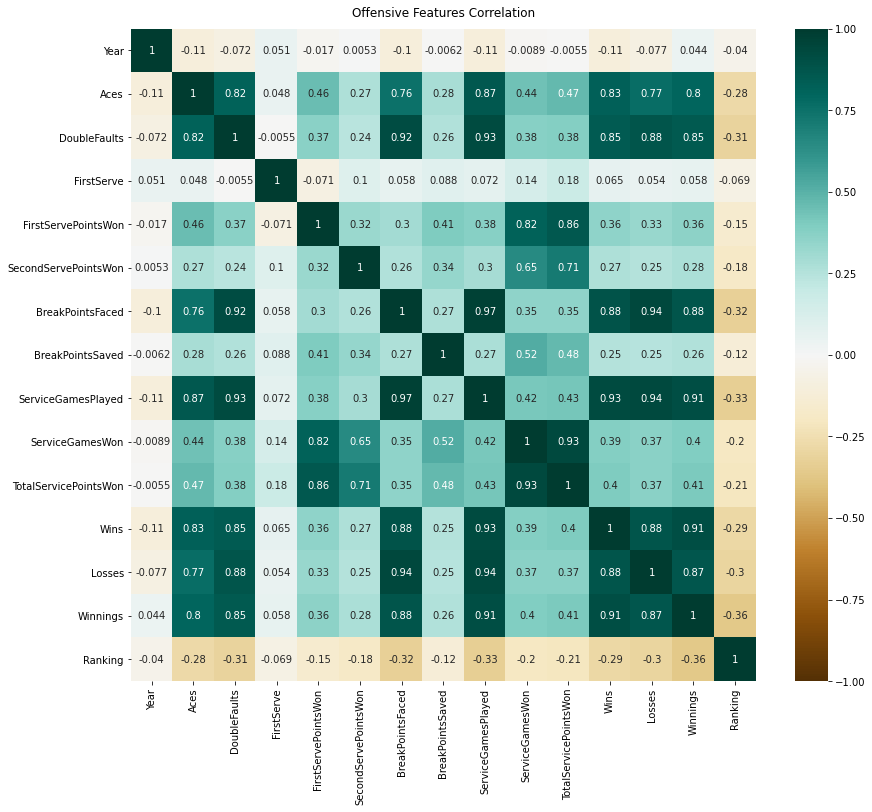

In [8]:
# heatmap of offensive moves correlation
f, ax = plt.subplots(figsize=(14, 12))

sns.heatmap(df_offensive.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Offensive Features Correlation', pad=12)

In [9]:
print('The offensive features that have the most impact in predicting the outcomes are: ')
print('Aces, DoubleFaults, BreakPointsFaced, ServiceGamesPlayed')

The offensive features that have the most impact in predicting the outcomes are: 
Aces, DoubleFaults, BreakPointsFaced, ServiceGamesPlayed


In [10]:
# correlation matrix of defensive moves and outcomes
df_defensive.corr()

,Year,FirstServeReturnPointsWon,SecondServeReturnPointsWon,BreakPointsOpportunities,BreakPointsConverted,ReturnGamesPlayed,ReturnGamesWon,ReturnPointsWon,TotalPointsWon,Wins,Losses,Winnings,Ranking
Year,1.000000,-0.106784,-0.039087,-0.114806,-0.072404,-0.108405,-0.073256,-0.078229,-0.041790,-0.108235,-0.077181,0.043908,-0.040483
FirstServeReturnPointsWon,-0.106784,1.000000,0.301265,0.313338,0.324057,0.261871,0.757435,0.834267,0.496682,0.256029,0.243278,0.240808,-0.178664
SecondServeReturnPointsWon,-0.039087,0.301265,1.000000,0.249583,0.264413,0.209937,0.603755,0.727338,0.408975,0.193093,0.185217,0.199401,-0.159592
BreakPointsOpportunities,-0.114806,0.313338,0.249583,1.000000,0.086502,0.978824,0.358483,0.352783,0.491198,0.923453,0.909295,0.900444,-0.334548
BreakPointsConverted,-0.072404,0.324057,0.264413,0.086502,1.000000,0.083155,0.561759,0.387170,0.255050,0.076989,0.062297,0.075022,-0.051005
ReturnGamesPlayed,-0.108405,0.261871,0.209937,0.978824,0.083155,1.000000,0.294470,0.291782,0.488351,0.928408,0.936755,0.912613,-0.331478
ReturnGamesWon,-0.073256,0.757435,0.603755,0.358483,0.561759,0.294470,1.000000,0.872216,0.549022,0.292920,0.263472,0.279645,-0.191280
ReturnPointsWon,-0.078229,0.834267,0.727338,0.352783,0.387170,0.291782,0.872216,1.000000,0.565603,0.280240,0.265271,0.271646,-0.202597
TotalPointsWon,-0.041790,0.496682,0.408975,0.491198,0.255050,0.488351,0.549022,0.565603,1.000000,0.459368,0.428543,0.461061,-0.272007
Wins,-0.108235,0.256029,0.193093,0.923453,0.076989,0.928408,0.292920,0.280240,0.459368,1.000000,0.878732,0.913297,-0.287018


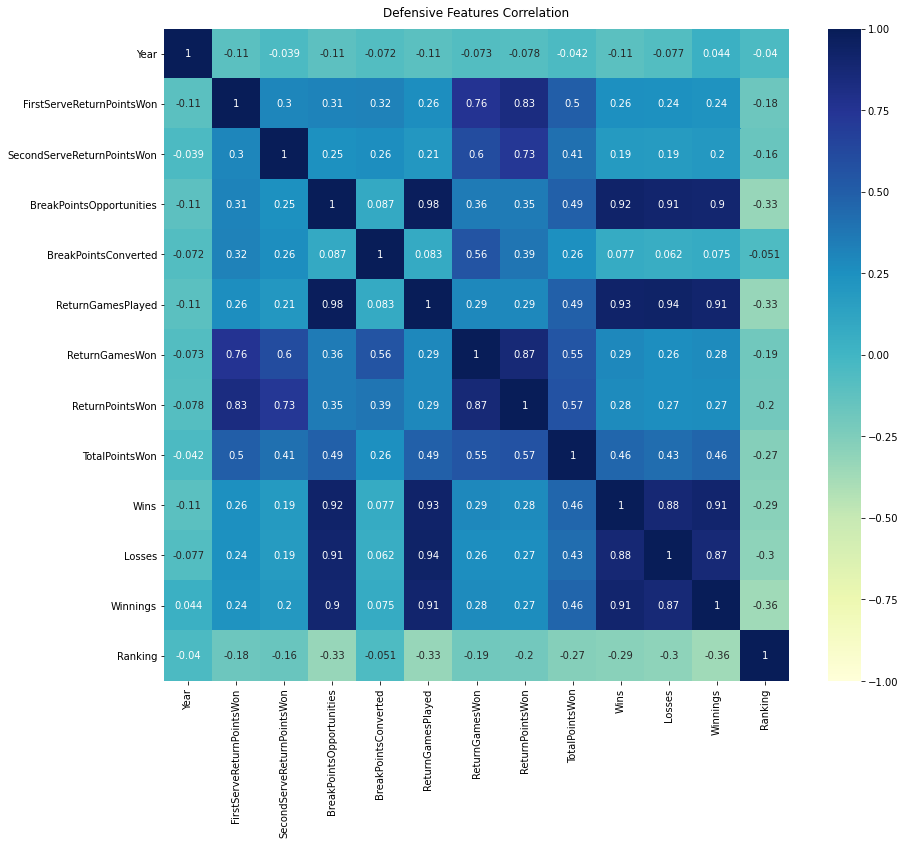

In [11]:
# heatmap of defensive moves correlation

f, ax = plt.subplots(figsize=(14, 12))

sns.heatmap(df_defensive.corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')

plt.title('Defensive Features Correlation', pad=12)
plt.show()

In [12]:
print('The defensive features that have the most impact in predicting the outcomes are:') 
print('BreakPointsOpportunities, ReturnGamesPlayed, TotalPointsWon')

The defensive features that have the most impact in predicting the outcomes are:
BreakPointsOpportunities, ReturnGamesPlayed, TotalPointsWon


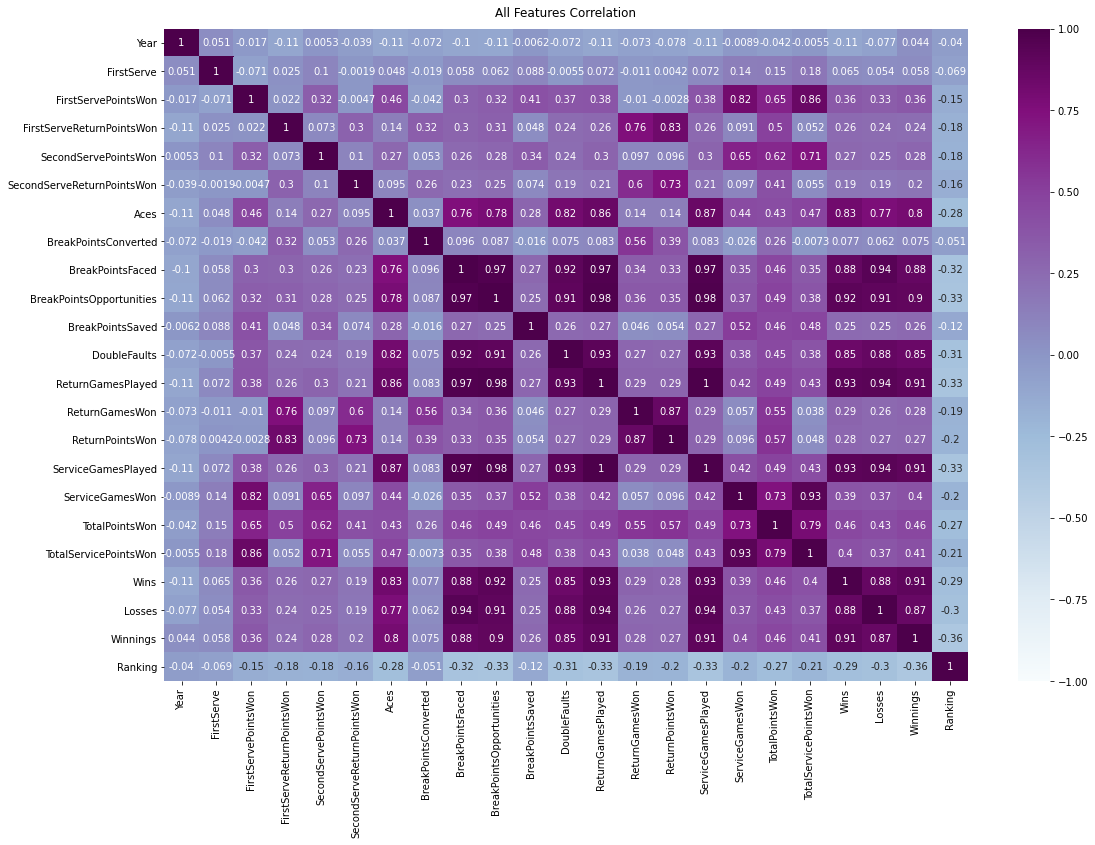

In [13]:
# heatmap of all features correlation

f, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='BuPu')

plt.title('All Features Correlation', pad=12)
plt.show()

In [14]:
print('The features that have the most impact in predicting the outcomes are:') 
print('Aces, BreakPointsFaced, BreakPointsOpportunities, DoubleFaults, ReturnGamesPlayed and ServiceGamesPlayed')

The features that have the most impact in predicting the outcomes are:
Aces, BreakPointsFaced, BreakPointsOpportunities, DoubleFaults, ReturnGamesPlayed and ServiceGamesPlayed


In [15]:
# store relevant features in df
relevant_features = df[['Aces', 'BreakPointsFaced', 'BreakPointsOpportunities', 'DoubleFaults', 'ReturnGamesPlayed', 'ServiceGamesPlayed', 'Wins', 'Losses']]

In [16]:
# function to plot histogram of relevant features
def features_histogram():
  # store features column names
  Xs = list(relevant_features.columns)
  Xs = Xs[:-2:]

  # variable to store graph position
  n = 1

  fig = plt.figure(figsize=(20,8))
  # adjust verticle space between subplots
  plt.subplots_adjust(hspace=0.4)

  for el in Xs:
    ax = plt.subplot(2, 3, n)
    plt.hist(relevant_features[el], bins=15, color='gold')
    # mean
    plt.axvline(relevant_features[el].mean(), linestyle='dashed', linewidth=2, color='red', label='Mean')
    # median
    plt.axvline(relevant_features[el].median(), linestyle='dashed', linewidth=2, color='green', label='Median')
    plt.xlabel(el)
    plt.ylabel('Frequency')
    plt.legend()
    plt.title(f'{el} Histogram', pad=12)
    n += 1

  plt.show()


# Distribution of Relevant Features

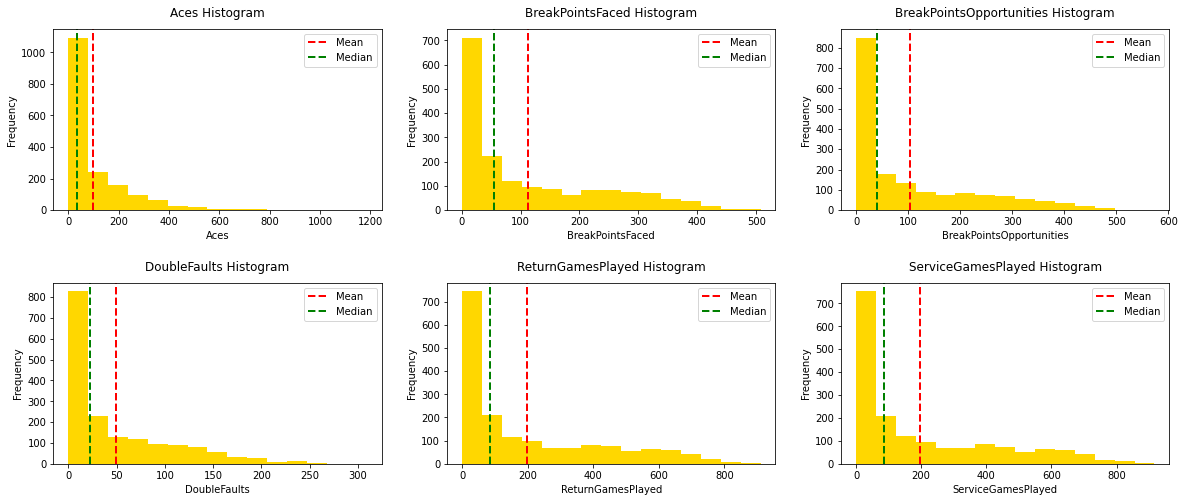

In [17]:
# plot histograms
features_histogram()

# Scatter Plot of Relevant Features Vs Outcome

In [18]:
# function of scatter plots of relevant features against outcome
def features_vs_outcome(outcome):
  # store features column names
  Xs = list(relevant_features.columns)
  Xs = Xs[:-2:]

  # variable to store graph position
  n = 1


  fig = plt.figure(figsize=(20, 8))
  # adjust vertical space between subplots
  plt.subplots_adjust(hspace = 0.4)

  for el in Xs:
    ax = plt.subplot(2, 3, n)
    plt.scatter(x=relevant_features[el], y=relevant_features[outcome], alpha=0.4, color='purple')
    plt.xlabel(el)
    plt.ylabel(outcome)
    plt.title(f'{el} Vs {outcome}', pad=12)
    n += 1

  plt.show()

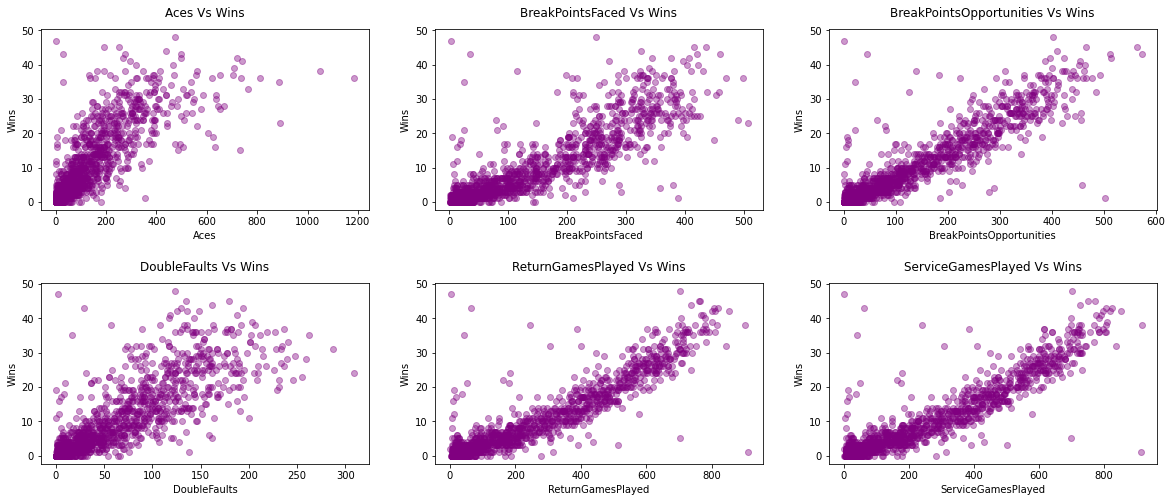

In [19]:
# scatter plots of relevant features agaisnt wins
features_vs_outcome('Wins')

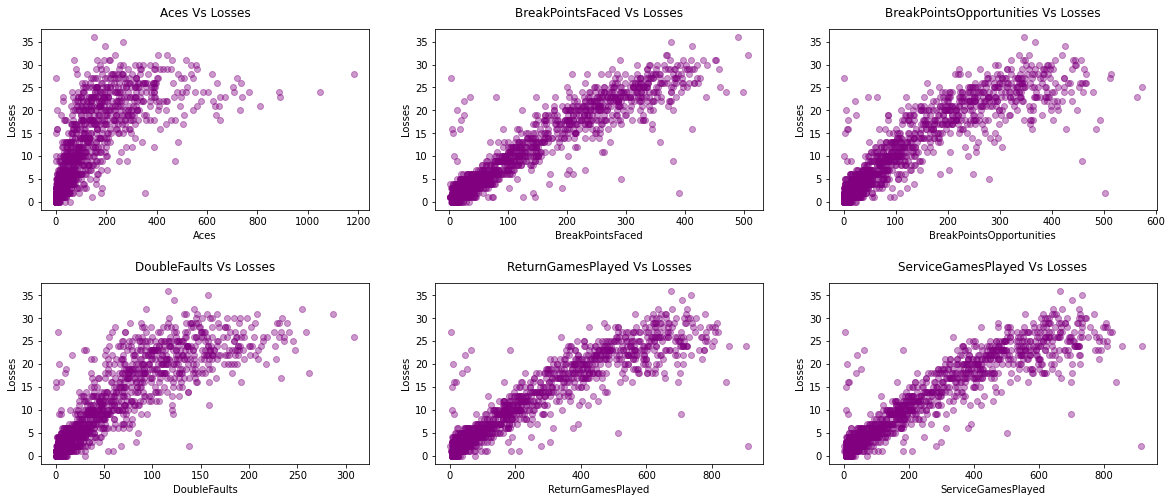

In [20]:
# scatter plots of relevant features against losses 
features_vs_outcome('Losses')


# Simple Linear Regression Model 
- Aces to Predict Wins

In [21]:
# import modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
# set feature(x) and outcome(y) & reshape (-1, 1)

x = df['Aces'].values
x = x.reshape(-1, 1)
print(f'x shape: {x.shape}')

y = df['Wins'].values
y = y.reshape(-1, 1)
print(f'y shape: {y.shape}')


x shape: (1721, 1)
y shape: (1721, 1)


In [23]:
# split data into train & test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [24]:
# simple regression >> Aces to predict Wins
line_fitter = LinearRegression()
line_fitter.fit(x_train, y_train)

b = line_fitter.intercept_
m = line_fitter.coef_

print(f'b: {b[0]}')
print(f'm: {m[0][0]}')

# predict y_values
y_predicted = line_fitter.predict(x)

b: 1.9087844835145988
m: 0.060276516286873694


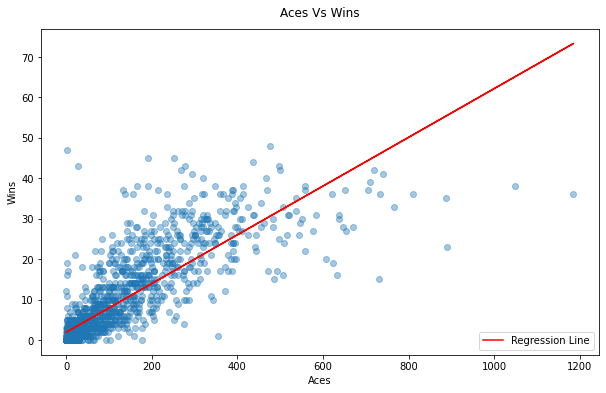

In [25]:
# plot scatter plot with regression line
f, ax = plt.subplots(figsize=(10, 6))

plt.scatter(x, y, alpha=0.4)
plt.plot(x, y_predicted, color='red', label='Regression Line')

plt.xlabel('Aces')
plt.ylabel('Wins')
plt.title('Aces Vs Wins', pad=12)

plt.legend(loc='lower right')
plt.show()


In [26]:
# evaluate models accuracy with test data
line_fitter.score(x_test, y_test)

0.6687992631115298

- Aces represent 71% of variation in Wins

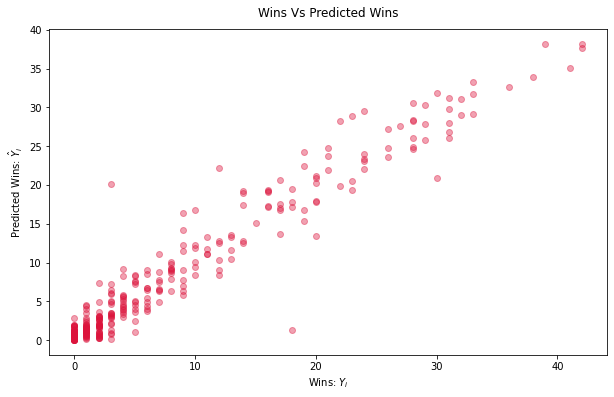

In [46]:
# predict y using the test data
prediction = line_fitter.predict(x_test)

# plot outcome Vs predicted_outcome
f, ax = plt.subplots(figsize=(10, 6))
plt.scatter(y_test, prediction, alpha=0.4, color='crimson')

plt.xlabel('Wins: $Y_i$')
plt.ylabel('Predicted Wins: $\hat{Y}_i$')
plt.title('Wins Vs Predicted Wins', pad=12)
plt.show()

# Multiple Linear Regression Model - Relevant Features to Predict Wins
- Aces
- BreakPointsFaced
- BreakPointsOpportunities
- DoubleFaults
- ReturnGamesPlayed
- ServiceGamesPlayed

In [28]:
# set features(x) and outcome(y) & reshape 

x = df[['Aces', 'BreakPointsFaced', 'BreakPointsOpportunities', 'DoubleFaults', 'ReturnGamesPlayed', 'ServiceGamesPlayed']]
y = df['Wins'].values

y = y.reshape(-1, 1)

print(f'x shape: {x.shape}')
print(f'y shape: {y.shape}')

x shape: (1721, 6)
y shape: (1721, 1)


In [29]:
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [32]:
# create model
line_fitter = LinearRegression()
line_fitter.fit(x_train, y_train)

b = line_fitter.intercept_
m = line_fitter.coef_

print(f'b: {b[0]}')
print(f'm: {m[0]}')

# predict y_values with test data
y_predicted = line_fitter.predict(x_test)

b: 0.1818593867942626
m: [ 0.00990548 -0.03467994  0.06162523 -0.00749072 -0.01445527  0.03834078]


In [33]:
# evaluate model's accuracy
train_score = line_fitter.score(x_train, y_train)
test_score = line_fitter.score(x_test, y_test)

print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.8738410812467363
Test Score: 0.9383148281815509


- The six relevant features [Aces', 'BreakPointsFaced', 'BreakPointsOpportunities', 'DoubleFaults', 'ReturnGamesPlayed', 'ServiceGamesPlayed'] explain 93% of variation in Wins

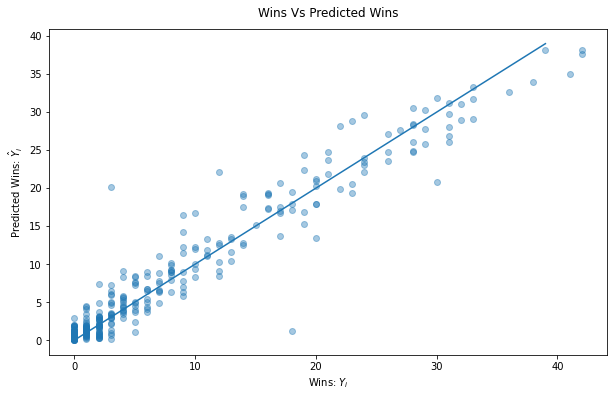

In [45]:
# plot outcome vs predicted outcome

f, ax = plt.subplots(figsize=(10, 6))

plt.scatter(y_test, y_predicted, alpha=0.4)
plt.plot(range(40), range(40))

plt.xlabel('Wins: $Y_i$')
plt.ylabel('Predicted Wins: $\hat{Y}_i$')
plt.title('Wins Vs Predicted Wins', pad=12)

plt.show()